In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

In [3]:
X,Y = fetch_openml('mnist_784', return_X_y = True)

In [4]:
# Data preparation
n_train = 6000
n_test = 1000
n_train_original = 60000
trainX = X[0:n_train,:]
trainY = Y[0:n_train]
testX = X[n_train_original:n_train_original + n_test,:]
testY = Y[n_train_original:n_train_original + n_test]

In [5]:
print (trainX.shape, trainY.shape, testX.shape, testY.shape)

(6000, 784) (6000,) (1000, 784) (1000,)


In [24]:
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
K = [1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]

In [ ]:
class KNN:
    def __init__(self, k):
        self.K = k

    def calcDistance(self, X, Y):
        ''' Calculates the Eucleidian distance between two numpy arrays  '''
        #print (X-Y)
        #print (np.sum((X-Y)**2))
        distance = np.sqrt(np.sum((X-Y)**2,axis=1))
        return distance

    def predict(self, trainX, trainY, testX):
        ''' Predicts the class of each test data'''
        n_testX = len(testX)
        pred = []
        for i in tqdm(range(n_testX)):
            dist = self.calcDistance(trainX, testX[i])
            #distance.append(dist)
            sorted_dist = np.argsort(dist)
            #print (self.K)
            #print (sorted_dist[:self.K])
            minKDist = sorted_dist[:self.K]
            minKVotes = trainY[minKDist]
            #print (minKVotes.astype('int'))
            eachPredClass = np.argsort(np.bincount(minKVotes.astype('int')))[-1]
            #print (eachPredClass)
            pred.append(eachPredClass)
        return pred
        
    def accuracy(self, predY, goldY):
        ''' Calculates error rate  of the code'''
        predY = np.array(predY)
        goldY = np.array(goldY)
        match = np.count_nonzero(predY == goldY)
        return round((1 - (match/len(goldY))),4)
    
def visualization(trainError, testError, KList):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(KList, trainError, label='TrainAccuracy',marker='o')
    ax.plot(KList, testError, label='TestAccuracy',marker='o')
    plt.xlim(0,110)
    plt.ylim(0,0.2)
    plt.title("KNN-Accuracy vs K")
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("Error_Rate")
    plt.show()
        

In [ ]:
#from tqdm import tqdm

n_iteration = 5
test_error = []
train_error = []
for eachK in K:
    print ("K:",eachK)
    knn = KNN(eachK)
    test_eachKError = []
    train_eachKError = []
    for eachIter in range(n_iteration):
        predY = knn.predict(trainX, trainY, testX)
        goldY = testY.astype('int').tolist()
        error = knn.accuracy(predY, goldY)
        test_eachKError.append(error)
        
        print (error)
        
        predY = knn.predict(trainX, trainY, trainX)
        goldY = trainY.astype('int').tolist()
        error = knn.accuracy(predY, goldY)
        train_eachKError.append(error)
        
        print (error)
    test_error.append(sum(test_eachKError)/len(test_eachKError))
    train_error.append(sum(train_eachKError)/len(train_eachKError))
    print(test_error[-1],train_error[-1])
    
print (test_error)
print (train_error)

K: 1


A Jupyter Widget

0.1


A Jupyter Widget

0.0


A Jupyter Widget

0.1


A Jupyter Widget

0.0


A Jupyter Widget

0.1


A Jupyter Widget

0.0


A Jupyter Widget

0.1


A Jupyter Widget

0.0


A Jupyter Widget

0.1


A Jupyter Widget

0.0
0.1 0.0
K: 9


A Jupyter Widget

0.08


A Jupyter Widget

0.05


A Jupyter Widget

0.08


A Jupyter Widget

0.05


A Jupyter Widget

0.08


A Jupyter Widget

0.05


A Jupyter Widget

0.08


A Jupyter Widget

0.05


A Jupyter Widget

0.08


A Jupyter Widget

0.05
0.08 0.05
K: 19


A Jupyter Widget

0.11


A Jupyter Widget

In [26]:
testError = [0.09599999999999997, 0.08399999999999996, 0.10899999999999999, 0.127, 0.131, 0.132, 0.14400000000000002, 0.15200000000000002, 0.15500000000000003, 0.16500000000000004, 0.17000000000000004]
trainError = [0.0, 0.04849999999999999, 0.06666666666666665, 0.07683333333333331, 0.08599999999999997, 0.09333333333333338, 0.10133333333333339, 0.10633333333333328, 0.11283333333333334, 0.1186666666666667, 0.1253333333333333]

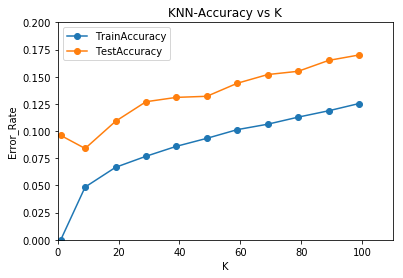

In [33]:
visualization(trainError, testError, K)

In [77]:
# x = np.array([[2,3,4],[1,2,3]])
# y = np.array([[1,1,1],[1,2,1]])
# print (calcDistance(x,y))

In [78]:
# r = np.array([9,4,56,7,40,1])
# p = np.array([11,22,11,44,11,22])
# print (r)
# z = p[np.argsort(r)[:3]]
# print (z)
# print ((np.argsort(np.bincount(z))[-1]))